In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
speed_data = pd.read_csv("speed_decision_data.csv")
speed_data.head()

,1 - Distance From Bump,Height of Bump,Speed
0,0.575374,0.680337,0
1,0.376002,0.278661,1
2,0.973890,0.741585,0
3,0.310378,0.342374,1
4,0.109521,0.268304,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


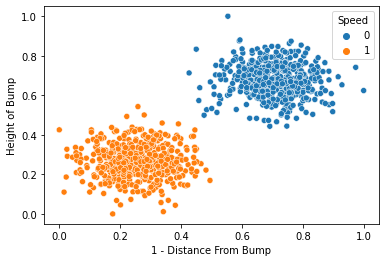

In [6]:
sns.scatterplot(speed_data['1 - Distance From Bump'], speed_data['Height of Bump'], hue = speed_data['Speed'])

In [7]:
X_train = speed_data[['1 - Distance From Bump', 'Height of Bump']]
y_train = speed_data['Speed']

In [13]:
model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
32/32 - 1s - loss: 0.6377 - 1s/epoch - 32ms/step
Epoch 2/100
32/32 - 0s - loss: 0.6324 - 52ms/epoch - 2ms/step
Epoch 3/100
32/32 - 0s - loss: 0.6273 - 65ms/epoch - 2ms/step
Epoch 4/100
32/32 - 0s - loss: 0.6222 - 63ms/epoch - 2ms/step
Epoch 5/100
32/32 - 0s - loss: 0.6171 - 65ms/epoch - 2ms/step
Epoch 6/100
32/32 - 0s - loss: 0.6122 - 96ms/epoch - 3ms/step
Epoch 7/100
32/32 - 0s - loss: 0.6073 - 110ms/epoch - 3ms/step
Epoch 8/100
32/32 - 0s - loss: 0.6025 - 84ms/epoch - 3ms/step
Epoch 9/100
32/32 - 0s - loss: 0.5976 - 58ms/epoch - 2ms/step
Epoch 10/100
32/32 - 0s - loss: 0.5929 - 65ms/epoch - 2ms/step
Epoch 11/100
32/32 - 0s - loss: 0.5881 - 42ms/epoch - 1ms/step
Epoch 12/100
32/32 - 0s - loss: 0.5834 - 38ms/epoch - 1ms/step
Epoch 13/100
32/32 - 0s - loss: 0.5787 - 37ms/epoch - 1ms/step
Epoch 14/100
32/32 - 0s - loss: 0.5742 - 44ms/epoch - 1ms/step
Epoch 15/100
32/32 - 0s - loss: 0.5696 - 43ms/epoch - 1ms/step
Epoch 16/100
32/32 - 0s - loss: 0.5651 - 37ms/epoch - 1ms/step
E

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [15]:
y_train_predict = (model.predict(X_train) > 0.5).astype("int32")

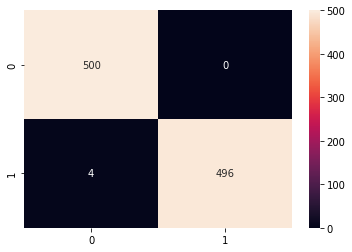

In [16]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_train, y_train_predict)

sns.heatmap(cm, annot=True, fmt="d")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


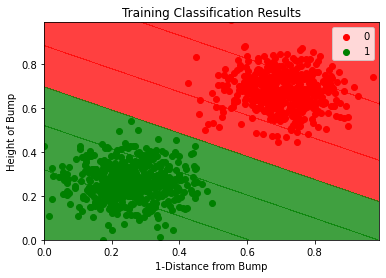

In [17]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train.values, y_train.values
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() , stop = X_set[:, 0].max(), step = 0.01),
                     np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Training Classification Results')
plt.xlabel('1-Distance from Bump')
plt.ylabel('Height of Bump')
plt.legend()
plt.show()

In [19]:
weights

array([[-1.8161365],
       [-3.4431252]], dtype=float32)

In [20]:
biases

array([2.1977012], dtype=float32)